In [1]:
#import external libraries
import pandas as pd
import os
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt
import statsmodels.api as sm

#plotting
%matplotlib notebook
import seaborn as sns
sns.set_style("whitegrid")
import plot_funcs

#import my settings
from settings import *
import CleanWxData as wx

In [18]:
save_plots=False
save_data=True

In [19]:
#Read in data
save_dir='./figs/'+Glacier+Station+ '/trends/'

data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"
fl=Glacier.lower() +Station + '_daily_LVL2.csv'
pth=os.path.join(data_dir, fl)
dat=pd.read_csv(pth)
print("read data from "+ pth)

#Set time index
dat.Date=pd.to_datetime(dat.Date)
dat=dat.set_index('Date')

# #Read in 15 min LVL2 data
# fl_15=Glacier.lower() +Station + '_15min_LVL2.csv'
# pth_15=os.path.join(data_dir, fl_15)
# dat_15=pd.read_csv(pth_15)

# #Set time index
# dat_15['local_time']=pd.to_datetime(dat_15.local_time, infer_datetime_format=True)
# dat_15=dat_15.set_index('local_time')

# print(pth_15)

read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/JuneauIcefield/AllYears/Wx/LVL2/juneauicefield5_daily_LVL2.csv


In [20]:
dat.tail()

,site_temp_USGS,Precipitation,Elevation,Units,Source,Station_ID,phase,snow,rain,WindSpeed,WS_Constant,Precip_AvgWindSpeed_UndercatchAdj,Precip_MeasuredWindSpeed_UndercatchAdj
Date,,,,,,,,,,,,,
2019-12-27,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-30,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-31,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# plt.figure()
# td_mn=dat.temp_diff.mean()
# plt.title('mean diff= ' +str(round(td_mn,2)) + ' C; sd=' + str(round(dat.temp_diff.std(),2)))
# plt.suptitle( 'Temperature: Straight Mean - WMO Mean at ' + Glacier+ ' Glacier')
# dat.temp_diff.plot(kind='hist', bins=100)
# plt.savefig(save_dir+'dailytemp_method_compare/USGS_WMO_diff_comparrison_'+ Glacier + Station + '.jpg' )

In [22]:
#Read in data
data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL3/"
save_dir='./figs/'+Glacier+Station+ '/trends/'

#fl="Undercatch_Adj" + Glacier+ "_Daily_Weather.csv"
fl='RainSnowFractionData_' + Glacier + Station+ '.csv'
if Glacier=='JuneauIcefield':
    data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL2/"
    fl=Glacier.lower() +Station + '_daily_LVL2.csv'
    temp_col_L3name='site_temp_USGS'    
pth=os.path.join(data_dir, fl)
dat=pd.read_csv(pth)
print("read data from "+ pth)

#Set time index
dat.Date=pd.to_datetime(dat.Date)
dat=dat.set_index('Date')

#Abbreviate precip column name
dat.rename(columns={'Precip_MeasuredWindSpeed_UndercatchAdj':'precip_adj'}, inplace=True)
#Add month column
dat['month']=dat.index.month
dat['decimal_date']=dat.index.year + (dat.index.dayofyear-1)/365

#If read in LVL2 data, rename temperature column
if Glacier=='JuneauIcefield':
    dat.rename(columns={temp_col_L3name:'Temperature'}, inplace=True)

read data from Q:/Project Data/GlacierData/Benchmark_Program/Data/JuneauIcefield/AllYears/Wx/LVL2/juneauicefield5_daily_LVL2.csv


In [23]:
dat.tail()

,Temperature,Precipitation,Elevation,Units,Source,Station_ID,phase,snow,rain,WindSpeed,WS_Constant,Precip_AvgWindSpeed_UndercatchAdj,precip_adj,month,decimal_date
Date,,,,,,,,,,,,,,,
2019-12-27,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019.986301
2019-12-28,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019.989041
2019-12-29,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019.991781
2019-12-30,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019.994521
2019-12-31,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2019.997260


In [24]:
#Subset to only FULL years of temperature data (cut off partial beginning and end)
start_year=str(dat.Temperature.first_valid_index().year+1)
end_year=str(dat.Temperature.last_valid_index().year -1)

In [25]:
plot_funcs.OLS_plot('decimal_date', 'Temperature', dat[start_year:'2019'], title='All Daily Observations')

,conf_high,conf_low,kendall_tau,kt_pval,r2,r2_p,slope
0,0.026902,0.035395,0.050212,1.772492e-33,0.0079,1.104649e-46,0.031149


In [26]:
#Define Seasons
summer_months=[4,5,6,7,8,9]
winter_months=[10,11,12,1,2,3]
spring_months=[3,4,5]
fall_months=[9,10,11]
May=[5]
June=[6]
July=[7]
August=[8]
Sept=[9]
season_list=[summer_months, winter_months, spring_months, fall_months]
month_list=[May, June, July, August, Sept]
season_names=['summer', 'winter', 'spring', 'fall']
month_names=['May', 'June', 'July', 'August', 'September']

In [27]:
#Jerry Rigging for Sperry, where only summer data is available:
# if Glacier + Station=='Sperry2440':
#     season_list=month_list
#     season_names=month_names
#     print('sperry')

In [28]:
temp_var='Temperature'
precip_var='Precipitation'

In [29]:
#Do you want to plot an anomaly time series or measured values?
anomaly_series=False
normal_period_start, normal_period_end= '1981', '2010' #1981-2010 is from Bienek 2014

if anomaly_series==True:
    for var in [temp_var, precip_var]:
        normal_period_mean=dat.loc[normal_period_start:normal_period_end, var].mean()
        normal_period_std=dat.loc[normal_period_start:normal_period_end, var].std()
        dat[var+'_anomaly']=(dat[var]-normal_period_mean)/normal_period_std 
        var=var+ '_anomaly' #reset the variable plotted below

In [33]:
#Save original data before time subset
dat_orig=dat.copy()

plt.ioff() #this keeps plots from appearing

#Do you want to plot for a specific time period, or whole record?
#Following McAfee 2010, 2 periods to interpret : 1950-2010; 1980-2010
time_periods=['full_period', '1980to2010', '1950to2010', '1980to2016']

if Glacier=='Sperry':
    time_periods=['full_period']

all_period_result_table=pd.DataFrame() #store all statistical results here
for time_limit in time_periods:
    print(" ")
    print("Time Limit: " + time_limit)
    if  time_limit=='1950to2010':
        dat=dat_orig['1950':'2010'].copy()
    if time_limit=='1980to2010':
        dat=dat_orig['1980':'2010'].copy()
    if time_limit=='1980to2016':
        dat=dat_orig['1980':'2016'].copy()
    if time_limit=='full_period':
        dat=dat_orig.copy()

    print("first valid index" + str(dat.Temperature.first_valid_index()))
    print("last valid index" + str(dat.Temperature.last_valid_index()))
    #Empty table to store results
    results_table=pd.DataFrame()

    #Aggregate to yearly data
    y_dat=pd.DataFrame()
    y_dat['snow']=wx.aggregate_time_with_threshold(dat['snow'], 'AS', func='sum', steps_in_period=365)
    y_dat['rain']=wx.aggregate_time_with_threshold(dat['rain'], 'AS', func='sum', steps_in_period=365)
    y_dat['snow_fraction']=y_dat.snow/(y_dat.snow+y_dat.rain)
    y_dat[precip_var]=wx.aggregate_time_with_threshold(dat[precip_var], 'AS', func='sum', steps_in_period=365)
    y_dat[temp_var]=wx.aggregate_time_with_threshold(dat[temp_var], 'AS', func='mean', steps_in_period=365)

    y_dat['decimal_date']=y_dat['decimal_date']=y_dat.index.year+ (y_dat.index.dayofyear -1)/365

    #Period-of-record mean yearly temperature and precip:
    print("Average Yearly Precipitation of "+ str() + str(round(y_dat.Precipitation.mean()/1000.,3))+ " m w.e.")
    print("Average Yearly Temperature of "+str(round(y_dat.Temperature.mean(),2))+ ' C')
    print("Average Yearly Snow Fraction of "+str(round(y_dat.snow_fraction.mean(),4))+ ' (fraction)')

#     print("n years missing temperature: " + str(len(y_dat['1969':'2016'][y_dat['1969':'2016'].Temperature.isnull()])))

    #plot ALL-Year temperature indexes
    for ii in ['min', 'max', 'mean', 'std']:
        agg_func=ii

        y_dat[temp_var]=wx.aggregate_time_with_threshold(dat[temp_var], 'AS', func=agg_func, steps_in_period=365)

        result=plot_funcs.OLS_plot('decimal_date', temp_var, dat=y_dat.dropna(subset=[temp_var]), title='Yearly '+ temp_var + "; "+ agg_func, aspect=1.5)

        result['time_limit']=time_limit; result['season']='whole_year'
        result['agg_function']=agg_func; result['Sensor']=temp_var
        results_table=results_table.append(result)

        if save_plots:
            #plt.savefig(save_dir + time_limit + '/' + Glacier + Station +'_OLS_Annual_'+ agg_func+temp_var +'.jpg')
            print('saved')

    #plot ALL-Year Precipitation indexes
    for ii in ['sum', 'std']:
        agg_func=ii

        y_dat['Precipitation']=wx.aggregate_time_with_threshold(dat[precip_var], 'AS', func=agg_func, steps_in_period=365)
        


        result=plot_funcs.OLS_plot('decimal_date', precip_var, dat=y_dat.dropna(subset=[precip_var]), title='Yearly '+ precip_var + "; "+ agg_func, aspect=1.5)

        result['time_limit']=time_limit; result['season']='whole_year'
        result['agg_function']=agg_func; result['Sensor']=precip_var
        results_table=results_table.append(result)

        if save_plots:
            #plt.savefig(save_dir + time_limit + '/' + Glacier + Station +'_OLS_Annual_'+ agg_func+precip_var +'.jpg')
            print('saving to: ' + save_dir + time_limit + '/' + Glacier + Station +'_OLS_Annual_'+ agg_func+precip_var +'.jpg')

    #Make seasonal plots of Temperature
    for ii in ['min', 'max', 'mean', 'std']:
        agg_func=ii

        for x in range(0,len(season_list)):
            season_name=season_names[x]
            season=season_list[x]    

            season_dat=dat[dat.month.isin(season)].copy() #subset to only the season
            seasonYrlydat=pd.DataFrame()
            seasonYrlydat[temp_var]=wx.aggregate_time_with_threshold(season_dat[temp_var], 'AS', func=agg_func, steps_in_period=90)
            seasonYrlydat['decimal_date']=seasonYrlydat['decimal_date']=seasonYrlydat.index.year+ (seasonYrlydat.index.dayofyear -1)/365

            print(agg_func+season_name)
            if not seasonYrlydat[temp_var].isnull().all():
                result=plot_funcs.OLS_plot('decimal_date', temp_var, dat=seasonYrlydat, title='Yearly ' +agg_func+ ' ' +season_name+ ' ' + temp_var , aspect=1.5)
            else:
                print('empty; skipping')
                continue
            result['time_limit']=time_limit; result['season']=season_name
            result['agg_function']=agg_func; result['Sensor']=temp_var
            results_table=results_table.append(result)

            #plt.savefig(save_dir + time_limit + '/' +'seasonal/' +temp_var + '/' + Glacier + Station+ '_' + season_name + '_trend_Annual_'+ agg_func+temp_var +'.jpg')

    plt.close('all')

    #Make seasonal precipitation plots
    for ii in ['max', 'mean', 'std', 'sum']:
        agg_func=ii


        for x in range(0,len(season_list)):
            season_name=season_names[x]
            season=season_list[x]    

            season_dat=dat[dat.month.isin(season)].copy() #subset to only the season
            seasonYrlydat=pd.DataFrame()
            seasonYrlydat[precip_var]=wx.aggregate_time_with_threshold(season_dat[precip_var], 'AS', func=agg_func, steps_in_period=90)
            seasonYrlydat['decimal_date']=seasonYrlydat['decimal_date']=seasonYrlydat.index.year+ (seasonYrlydat.index.dayofyear -1)/365
            result=plot_funcs.OLS_plot('decimal_date', precip_var, dat=seasonYrlydat, title='Seasonal ' +agg_func+ ' ' +season_name+ ' ' + precip_var , aspect=1.5)

            result['time_limit']=time_limit; result['season']=season_name
            result['agg_function']=agg_func; result['Sensor']=precip_var
            results_table=results_table.append(result)

            #plt.savefig(save_dir + time_limit + '/'+'seasonal/' +precip_var + '/' + Glacier + Station+ '_' + season_name + '_trend_Seasonal_'+ agg_func+precip_var +'.jpg')

    plt.close('all') #too many figures open

#     #Snow Fraction Plots
#     var='snow_fraction'
#     result=plot_funcs.OLS_plot('decimal_date', var, dat=y_dat, title='Yearly ' + var , aspect=1.5)
#     result['time_limit']=time_limit; result['season']='whole_year'
#     result['agg_function']='sum'; result['Sensor']=var
#     results_table=results_table.append(result)
    
#     #plt.savefig(save_dir + time_limit + '/' + Glacier + Station +'_OLS_Annual_'+ agg_func+ '_' +var +'.jpg')

#     for x in range(0,len(season_list)):
#         season_name=season_names[x]
#         season=season_list[x]    

#         season_dat=dat[dat.month.isin(season)].copy() #subset to only the season
#         seasonYrlydat=pd.DataFrame()
#         seasonYrlydat['snow']=wx.aggregate_time_with_threshold(season_dat['snow'], 'AS', func='sum', steps_in_period=90)
#         seasonYrlydat['rain']=wx.aggregate_time_with_threshold(season_dat['rain'], 'AS', func='sum', steps_in_period=90)
#         seasonYrlydat['decimal_date']=seasonYrlydat['decimal_date']=seasonYrlydat.index.year+ (seasonYrlydat.index.dayofyear -1)/365
#         seasonYrlydat['snow_fraction']=seasonYrlydat.snow/(seasonYrlydat.snow+seasonYrlydat.rain)


#         #Calculate snow fraction

#         result=plot_funcs.OLS_plot('decimal_date', var, dat=seasonYrlydat, title='Seasonal ' +var+ ": " +season_name , aspect=1.5)
#         result['time_limit']=time_limit; result['season']=season_name
#         result['agg_function']='sum'; result['Sensor']=var
#         results_table=results_table.append(result)

#         #plt.savefig(save_dir + time_limit + '/'+ 'seasonal/' +var + '/' + Glacier + Station+ '_' + season_name + '_trend_Seasonal_'+ 'sum'+var +'.jpg')

#     ##
#     #Number of Days Below Freezing
#     ##
    
#     var='n_days_below_0'
#     y_dat['n_days_below_0']=wx.aggregate_time_with_threshold(dat[temp_var]<0, 'AS', func='sum', steps_in_period=365) #sums the 'Trues'
#     y_dat.loc[y_dat[temp_var].isnull(), 'n_days_below_0']=pd.np.nan #set count to NAN in years missing temp data
#     result=plot_funcs.OLS_plot('decimal_date', 'n_days_below_0', dat=y_dat, title='Yearly ' +'n_days_below_0', aspect=1.5)
    
#     #plt.savefig(save_dir+time_limit+'/'+Glacier+Station+'_OLS_Annual_'+ var+'.jpg')
    
#     result['time_limit']=time_limit; result['season']='whole_year'
#     result['agg_function']='sum'; result['Sensor']=var
#     results_table=results_table.append(result)
    
#     for x in range(0,len(season_list)):
#         season_name=season_names[x]
#         season=season_list[x]    

#         season_dat=dat[dat.month.isin(season)].copy() #subset to only the season
#         seasonYrlydat=pd.DataFrame()
#         seasonYrlydat['n_days_below_0']=wx.aggregate_time_with_threshold(season_dat[temp_var]<0, 'AS', func='sum', steps_in_period=90)
#         seasonYrlydat[temp_var]=wx.aggregate_time_with_threshold(season_dat[temp_var], 'AS', func=agg_func, steps_in_period=90)

#         seasonYrlydat.loc[seasonYrlydat[temp_var].isnull(), 'n_days_below_0']=pd.np.nan #set count to NAN in years missing temp data

#         seasonYrlydat['decimal_date']=seasonYrlydat['decimal_date']=seasonYrlydat.index.year+ (seasonYrlydat.index.dayofyear -1)/365
#         result=plot_funcs.OLS_plot('decimal_date', 'n_days_below_0', dat=seasonYrlydat, title='Seasonal ' +'count'+ ' ' +season_name+ ' ' + 'ndays_below_freezing' , aspect=1.5)

#         result['time_limit']=time_limit; result['season']=season_name
#         result['agg_function']='count'; result['Sensor']=var
#         results_table=results_table.append(result)

#         #plt.savefig(save_dir + time_limit + '/'+ 'seasonal/' +'snow_fraction' + '/' + Glacier + Station+ '_' + season_name + '_trend_Seasonal_'+ 'sum'+var +'.jpg')

        
#     #Save Results
    results_table.to_csv(save_dir+"/" +time_limit+ "/"+ Glacier+ Station + "_" + time_limit +"_trend_results.csv", index=False)
    results_table[results_table.kt_pval<=0.10].to_csv(save_dir+"/" +time_limit+ "/"+ Glacier+ Station + "_" + time_limit +"_FieldSig_trend_results.csv", index=False)
    all_period_result_table=all_period_result_table.append(results_table)

 
Time Limit: full_period
first valid index1980-01-01 00:00:00
last valid index2010-12-31 00:00:00
Average Yearly Precipitation of 1.578 m w.e.
Average Yearly Temperature of 5.59 C
Average Yearly Snow Fraction of nan (fraction)
minsummer
minwinter
minspring
minfall
maxsummer
maxwinter
maxspring
maxfall
meansummer
meanwinter
meanspring
meanfall
stdsummer
stdwinter
stdspring


C:\Users\ehbaker\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\axisgrid.py:307: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


stdfall
 
Time Limit: 1980to2010
first valid index1980-01-01 00:00:00
last valid index2010-12-31 00:00:00
Average Yearly Precipitation of 1.578 m w.e.
Average Yearly Temperature of 5.59 C
Average Yearly Snow Fraction of nan (fraction)
minsummer
minwinter
minspring
minfall
maxsummer
maxwinter
maxspring
maxfall
meansummer
meanwinter
meanspring
meanfall
stdsummer
stdwinter
stdspring
stdfall
 
Time Limit: 1950to2010
first valid index1980-01-01 00:00:00
last valid index2010-12-31 00:00:00
Average Yearly Precipitation of 1.578 m w.e.
Average Yearly Temperature of 5.59 C
Average Yearly Snow Fraction of nan (fraction)
minsummer
minwinter
minspring
minfall
maxsummer
maxwinter
maxspring
maxfall
meansummer
meanwinter
meanspring
meanfall
stdsummer
stdwinter
stdspring
stdfall
 
Time Limit: 1980to2016
first valid index1980-01-01 00:00:00
last valid index2010-12-31 00:00:00
Average Yearly Precipitation of 1.578 m w.e.
Average Yearly Temperature of 5.59 C
Average Yearly Snow Fraction of nan (fraction)

In [35]:
dat.tail()

,Temperature,Precipitation,Elevation,Units,Source,Station_ID,phase,snow,rain,WindSpeed,WS_Constant,Precip_AvgWindSpeed_UndercatchAdj,precip_adj,month,decimal_date
Date,,,,,,,,,,,,,,,
2010-12-27,-1.95,3.3,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2010.986301
2010-12-28,-4.45,0.8,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2010.989041
2010-12-29,-6.65,0.5,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2010.991781
2010-12-30,-0.85,6.4,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2010.994521
2010-12-31,1.40,9.4,4.9,SCI,JUNEAU,USW00025309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,2010.997260


<IPython.core.display.Javascript object>


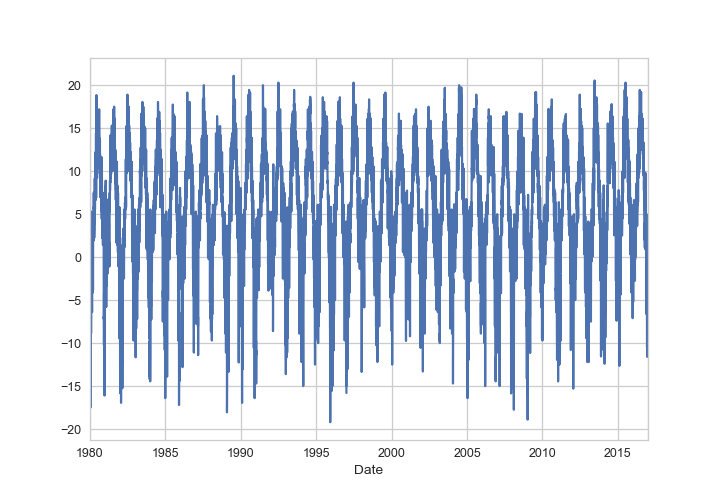

In [19]:
%matplotlib notebook
dat.Temperature.plot()

In [36]:
#Save Results
all_period_result_table.sort_values(['Sensor', 'agg_function','season', 'time_limit'], inplace=True) #sort
all_period_result_table.to_csv(save_dir+"/" + Glacier+ Station  +"_trend_results.csv", index=False)
all_period_result_table[all_period_result_table.kt_pval<=0.10].to_csv(save_dir+"/" + Glacier+ Station  +"_fieldSignif_trend_results.csv", index=False)
all_period_result_table[(all_period_result_table.kt_pval<=0.10) & (all_period_result_table.time_limit=='full_period')].to_csv(save_dir+"/" + Glacier+ Station  +"_fieldSignif_trend_results_full_period_onlyCHRIS.csv", index=False)

In [21]:
save_dir+"/" + Glacier+ Station  +"_fieldSignif_trend_results_full_period_onlyCHRIS.csv"

'./figs/LemonCreek5/trends//LemonCreek5_fieldSignif_trend_results_full_period_onlyCHRIS.csv'

In [22]:
pwd

'C:\\Users\\ehbaker\\Documents\\Python\\WXmunge'

In [ ]:
#Daily Data Analysis
sensor_vars=['Precipitation', 'Temperature', 'snow', 'rain']
plt.ioff() #this keeps plots from appearing

#Keep all available data for trend analysis; create new table
results_table2=pd.DataFrame()
for time_limit in time_periods:
    print(" ")
    print("Time Limit: " + time_limit)
    if  time_limit=='1950to2010':
        dat=dat_orig['1950':'2010'].copy()
    if time_limit=='1980to2010':
        dat=dat_orig['1980':'2010'].copy()
    if time_limit=='1980to2016':
        dat=dat_orig['1980':'2016'].copy()
    if time_limit=='full_period':
        dat=dat_orig[start_year: end_year] #need to subset so that have FULL years (no partial; seasonality)
    for var in sensor_vars:
        print(var)
        if dat[var].isnull().all():
            print("All " + var + " is null; skipping.")
            continue
        #Do Trend Analysis for all daily values (no aggregation to seasonal or yearly mean)
        result=plot_funcs.OLS_plot('decimal_date', var, dat=dat, title='Daily ' +var , aspect=1.5)
        
        plt.savefig(save_dir + time_limit + '/' + Glacier + Station+ '_AllDailyData_' + var +'.jpg')

        result['time_limit']=time_limit; result['season']='all available data'
        result['agg_function']='none'; result['Sensor']=var
        results_table2=results_table2.append(result)

In [ ]:
#Save Results
results_table2.sort_values(['Sensor', 'agg_function','season', 'time_limit'], inplace=True) #sort
results_table2.to_csv(save_dir+"/" + Glacier+ Station  +"_trend_results.csv", index=False)
results_table2[results_table2.kt_pval<=0.10].to_csv(save_dir+"/" + Glacier+ Station  +"_fieldSignif_trend_results_AllDaily.csv", index=False)
results_table2[(results_table2.kt_pval<=0.10) & (results_table2.time_limit=='full_period')].to_csv(save_dir+"/" + Glacier+ Station  +"_fieldSignif_trend_results_full_period_only_AllDaily.csv", index=False)

In [ ]:
# #Number of days above freezing
# y_dat['n_days_below_0']=wx.aggregate_time_with_threshold(dat[temp_var]>0, 'AS', func='sum', steps_in_period=365) #sums the 'Trues'

# result=plot_funcs.OLS_plot('decimal_date', 'n_days_below_0', dat=y_dat, title='Yearly ' +'n_days_below_0', aspect=1.5)

#     for x in range(0,len(season_list)):
#         season_name=season_names[x]
#         season=season_list[x]    

#         season_dat=dat[dat.month.isin(season)].copy() #subset to only the season
#         seasonYrlydat=pd.DataFrame()
#         seasonYrlydat['n_days_below_0']=wx.aggregate_time_with_threshold(season_dat[temp_var]<0, 'AS', func='sum', steps_in_period=90)
#         seasonYrlydat['decimal_date']=seasonYrlydat['decimal_date']=seasonYrlydat.index.year+ (seasonYrlydat.index.dayofyear -1)/365
#         result=plot_funcs.OLS_plot('decimal_date', 'n_days_below_0', dat=seasonYrlydat, title='Seasonal ' +'count'+ ' ' +season_name+ ' ' + 'ndays_below_freezing' , aspect=1.5)


In [ ]:
#OLS model just to check
res=sm.OLS(y_dat["Temperature"], sm.add_constant(y_dat['decimal_date']), missing='drop').fit()

res.summary()

In [ ]:
plot_funcs.OLS_plot('decimal_date', 'n_days_below_0', dat=seasonYrlydat, title='Seasonal ' +'count'+ ' ' +season_name+ ' ' + 'ndays_below_freezing' , aspect=1.5)


In [ ]:
%matplotlib notebook

In [ ]:
start_year